In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
import random
from collections import defaultdict
from sklearn import metrics
from time import time
import numpy as np
import re
from nltk.corpus import stopwords
import unicodedata
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import seaborn as sns

In [2]:
# CSV "2022_Urgencia_texto_limpo.csv" with only one column, without header
# read_csv
justificativas_limpo = pd.read_csv("2022_Urgencia_texto_limpo.csv", sep=";", encoding="latin-1")

print(justificativas_limpo.columns)

justificativas_limpo.dropna(inplace=True)

list_justificativa = justificativas_limpo['justificativa_urgencia_viagem'].tolist()

print(len(list_justificativa))

Index(['justificativa_urgencia_viagem'], dtype='object')
384328


In [3]:
list_justificativa = random.sample(list_justificativa, 120000)

print(list_justificativa[:10])

['conforme publicado bi maio b mnt sup av ex conforme nota credito nr nc jul colog', 'conforme necessidade missao', 'conforme anexo', 'exame proeficiencia missao exterior', 'conforme autorizacao anexa', 'solicitada data coordenacao viagem', 'formulario solicitacao diarias chegou unidade scdp antecedencia minimum exigida', 'convocacao participar reuniao colegiado ensino coen', 'missao transporte autoridade sc', 'reuniao colegio dirigentes']


In [4]:
n_comp = 50

In [5]:
count_vectorizer = CountVectorizer(max_df=0.9, min_df=0.01)
X_count = count_vectorizer.fit_transform(list_justificativa)


In [6]:
# lsa_count = make_pipeline(TruncatedSVD(n_components=n_comp), Normalizer(copy=False))
# X_count = lsa_count.fit_transform(X_count)
# explained_variance = lsa_count[0].explained_variance_ratio_.sum()

In [7]:
print(X_count.shape)

(120000, 150)


In [8]:
sample = list_justificativa
vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.01)
X = vectorizer.fit_transform(sample)

In [9]:
lsa = make_pipeline(TruncatedSVD(n_components=n_comp, random_state=42), Normalizer(copy=False))
X = lsa.fit_transform(X)
explained_variance = lsa[0].explained_variance_ratio_.sum()
print(f"Explained variance of the SVD step: {explained_variance:.2f} for {n_comp} components")

Explained variance of the SVD step: 0.65 for 50 components


In [28]:
neighbors = NearestNeighbors(n_neighbors=99)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

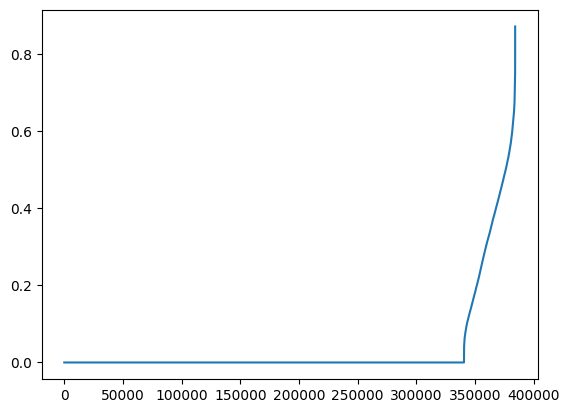

In [29]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

In [10]:
db = DBSCAN(eps=0.08, min_samples=99, algorithm='auto').fit(X)

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 139
Estimated number of noise points: 69560


In [11]:
idx = np.argsort(db.core_sample_indices_)
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[db.core_sample_indices_[idx]] = True


def get_clustered_sentences(labels, sentences):
    clustered_sentences = defaultdict(list)
    for sentence_id, cluster_id in enumerate(labels):
        if cluster_id >= 0:
            clustered_sentences[cluster_id].append(sentences[sentence_id])
    return clustered_sentences


clustered_sentences = get_clustered_sentences(labels, sample)

print(len(clustered_sentences))
print(clustered_sentences.keys())


# for cluster_id, sentences in clustered_sentences.items():
#     print(f"Cluster {cluster_id}:")
#     print(sentences[:10])
#     print()


139
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138])


In [12]:
# 1-D swarmplot
# sns.swarmplot(x=clusters_count['phrase'], color="red")

In [13]:
for i in range(n_clusters_):
    print("Cluster %d:" % i),
    print("Cluster size: %d" % len(clustered_sentences[i]))

    set_phrases = set(clustered_sentences[i])

    for phr in random.sample(set_phrases,min(20, len(set_phrases))):
        print("  %s" % phr)
    print("\n")


Cluster 0:
Cluster size: 839
  conforme necessidade missao


Cluster 1:
Cluster size: 1989
  conforme facd anexo
  conforme anexo
  ensaios analiticos serem acompanhados previstos serem executados conforme mail anexo
  conforme justificaviva anexo
  conforme justificativas constantes ficha complementar anexo
  conforme ficha sad anexo
  conforme autorizacoes anexo
  conforme aev encontra anexo
  conforme justificativas descritas ficha complementar anexo
  bilhete remarcado conforme documento anexo
  conforme memorando anexo
  conforme document anexo
  conforme diex anexo
  conforme documento anexo
  conforme n anexo
  conforme anexo militar possui auxilio alimentacao
  conforme s anexo
  conforme requerimento anexo
  conforme documento aev aprovado anexo
  solicitado conforme email anexo


Cluster 2:
Cluster size: 824
  missao inopinada determinada cmt ex
  missao sigilosa
  missao eb
  missao aprovada versao
  missao implantacao sistemas vigilancia eletronica dtcea ctd
  militar desig

/tmp/ipykernel_4013/3344563523.py:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  for phr in random.sample(set_phrases,min(20, len(set_phrases))):


In [14]:
#http://datamining.rutgers.edu/publication/internalmeasures.pdf

## Silhouette Coefficient

In [15]:
metrics.silhouette_score(X, labels, metric='euclidean', sample_size=40000, random_state=42)

0.1462649119949248

## Calinski-Harabasz Index

In [16]:
metrics.calinski_harabasz_score(X, labels)

604.0538120274036

## Davies-Bouldin Index

In [17]:
metrics.davies_bouldin_score(X, labels)

0.9960529816598754